In [1]:
import tensorflow as tf 
from tensorflow import keras
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import librosa
import librosa.display as lplt
from IPython.display import Audio
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from keras.models import Sequential
from tensorflow.keras import layers, models

2024-03-03 22:58:27.768237: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 22:58:27.768264: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 22:58:27.769487: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-03 22:58:27.776516: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-03 22:58:28.622138: W tensorflow/compiler/tf2

In [2]:
df = pd.read_csv("Data/features_3_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
df.shape

(9990, 60)

In [4]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [5]:
df = df.drop(labels='filename', axis=1)

In [6]:
audio_record = 'Data/genres_original/country/country.00015.wav'
data, sr = librosa.load(audio_record)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [7]:
librosa.load(audio_record, sr = 45600)

(array([-0.01232042, -0.01723692, -0.00234439, ...,  0.29566735,
         0.25071272,  0.12660554], dtype=float32),
 45600)

In [8]:
Audio(data, rate=sr)

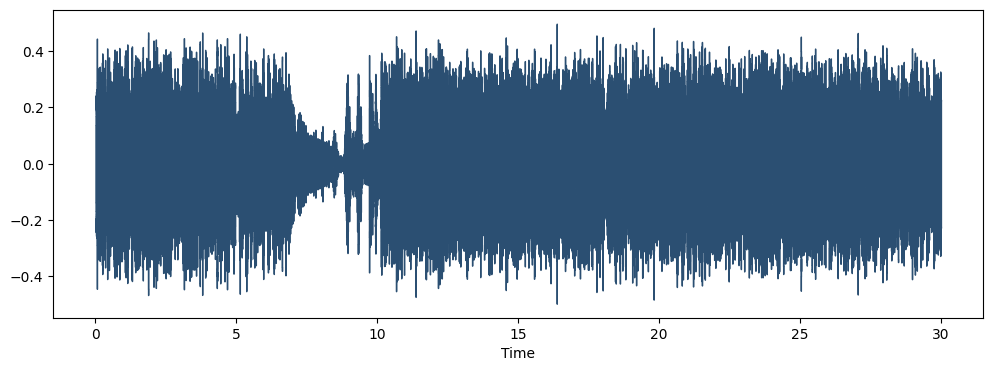

In [9]:
plt.figure(figsize=(12,4))
lplt.waveshow(data, color = '#2B4F72')
plt.show()

/tmp/ipykernel_51716/1814425571.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  lplt.specshow(stft, sr = sr, x_axis='time', y_axis = 'hz')


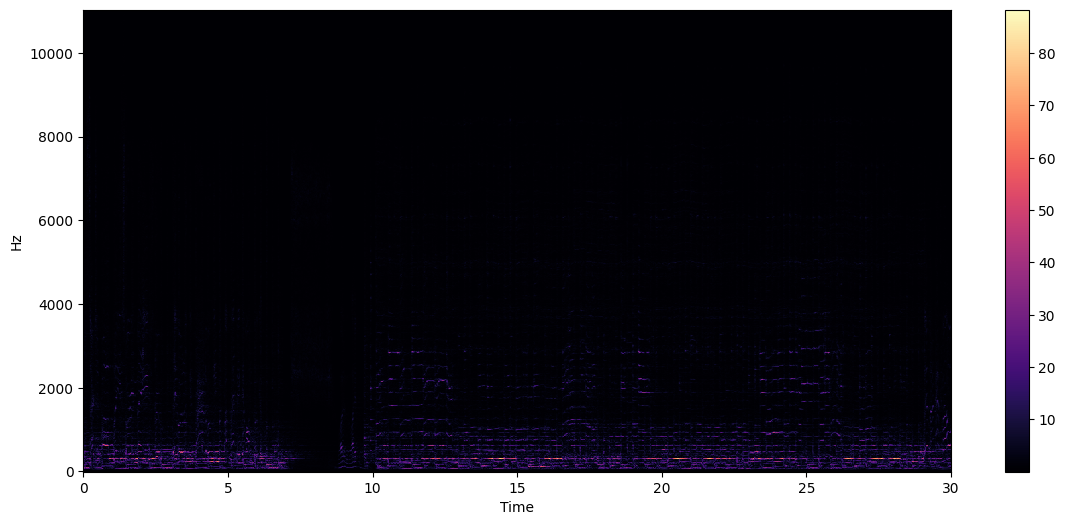

In [10]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
lplt.specshow(stft, sr = sr, x_axis='time', y_axis = 'hz')
plt.colorbar()

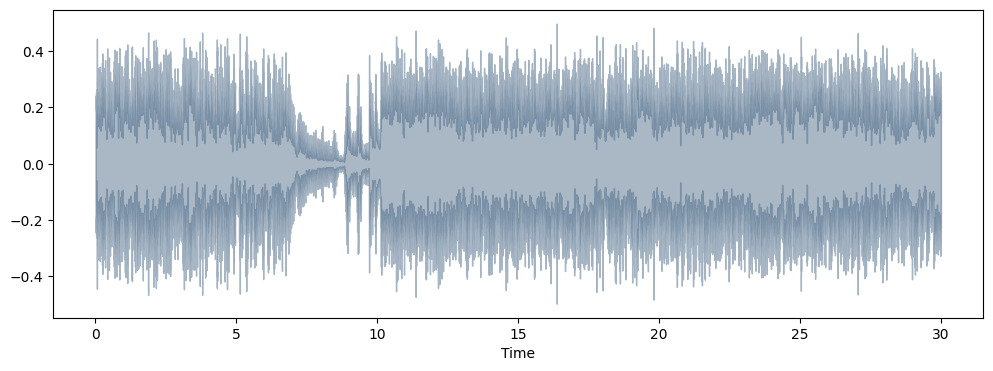

In [11]:
spectral_rolloff = librosa.feature.spectral_rolloff(y = data+0.01, sr=sr)[0]
plt.figure(figsize=(12,4))
lplt.waveshow(data, sr=sr, alpha = 0.4, color = '#2B4F72')

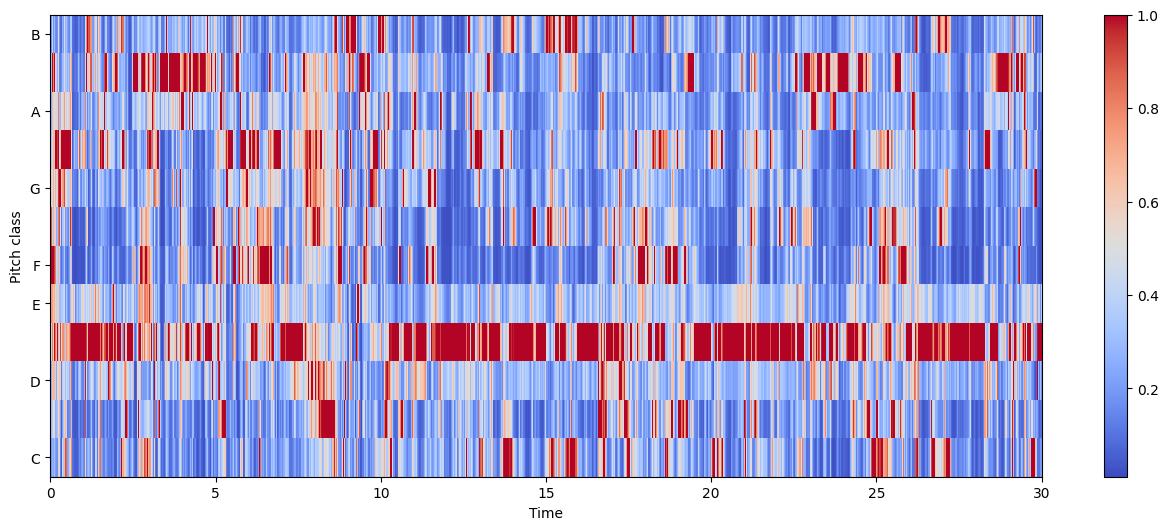

In [12]:
chroma = librosa.feature.chroma_stft(y = data, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr = sr, x_axis='time', y_axis = 'chroma', cmap = 'coolwarm')
plt.colorbar()
plt.show()

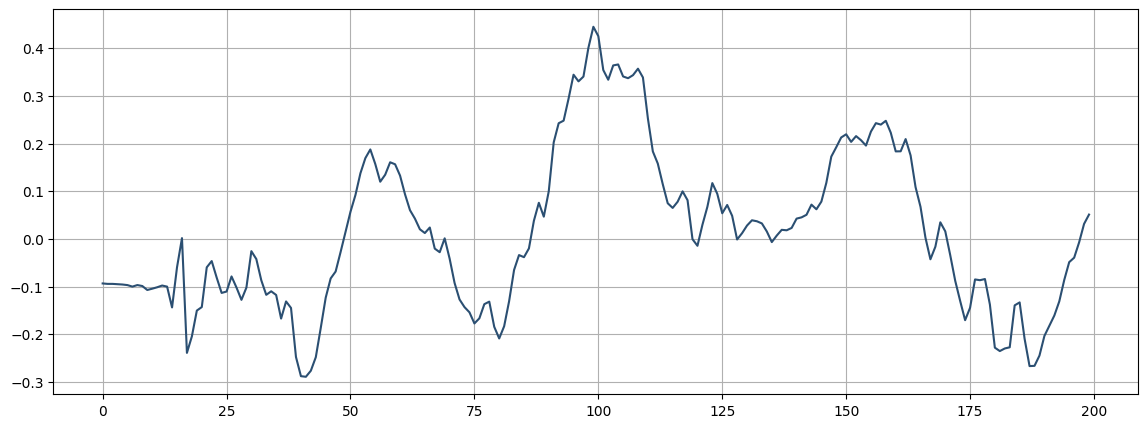

In [13]:
start = 1000
end = 1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end], color = '#2B4F72')
plt.grid()

In [14]:
zero_cross_rate = librosa.zero_crossings(data[start:end], pad = False) 
print('The number of zero crossing is : ',sum(zero_cross_rate) )

The number of zero crossing is :  17


In [15]:
class_list = df.iloc[:,-1]
convertor = LabelEncoder()

In [16]:
y = convertor.fit_transform(class_list)

In [17]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [18]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [19]:
fit = StandardScaler()
x =  fit.fit_transform(np.array(df.iloc[:,:-1], dtype =float))

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [21]:
len(x_test)

3297

In [22]:
len(x_train)

6693

In [23]:
len(y_test)

3297

In [24]:
len(y_train)

6693

In [25]:
def train_model(model, epochs, optimizer):
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs)
    return model_history

In [26]:
def plotValidate(history):
    print('validation Accuracy', max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize = (12,6))
    plt.show()

In [27]:
model = models.Sequential([
    layers.Dense(units=512, input_shape=(x_train.shape[1],), activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(units=256,  activation = 'relu'),
    layers.Dropout(0.2),

    layers.Dense(units=128, activation = 'relu'),
    layers.Dropout(0.2),

    layers.Dense(units=64, activation = 'relu'),
    layers.Dropout(0.2),

    layers.Dense(units=10, activation = 'softmax'),
])

# model = keras.Sequential([
#     layers.Dense(units=512, input_shape = (x_train.shape[1]), activation='relu'),
#     layers.Dense(units=12, activation='relu'),
#     layers.Dense(units=1)
# ])

print(model.summary())
# model_history = train_model(model = model, epochs=600, optimizer='adam') 
model_history = train_model(model=model, epochs=300, optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print('The test loss is :', test_loss)
print('\n The best test Accuracy is :', test_acc*100)

26/26 [==============================] - 0s 2ms/step - loss: 0.7746 - accuracy: 0.9184
The test loss is : 0.7746254205703735

 The best test Accuracy is : 91.84106588363647


validation Accuracy 0.9217470288276672


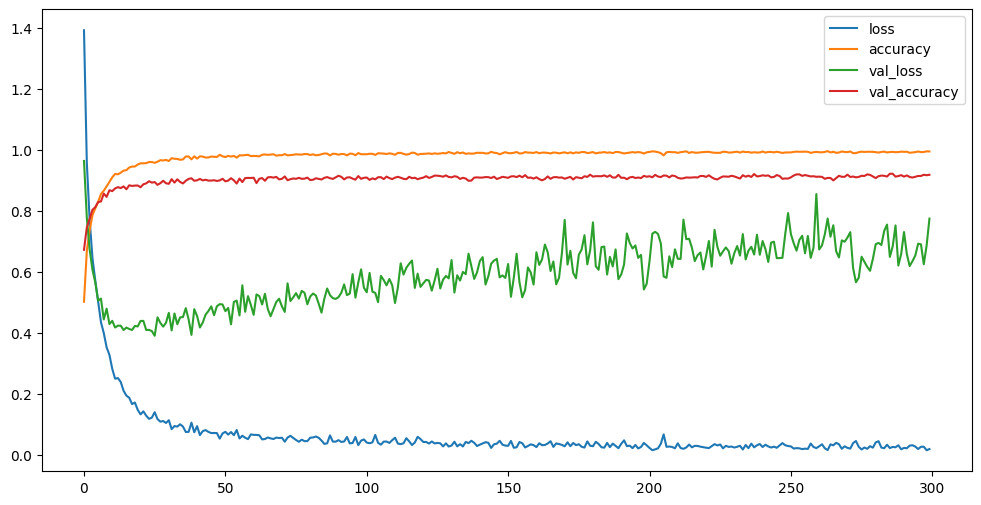

In [29]:
plotValidate(model_history)